# Diabetes Prediction

> This notebook focuses on predicting diabetes using a machine learning approach. The dataset used contains various health-related parameters to determine whether a patient is diabetic.

there can be many approaches to view this. we are going to see a few of them. pretty basic someone coud say

Loading libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

Loading the Dataset

In [75]:
df_original = pd.read_csv('datasets/diabetes.csv')
pima = df_original.copy()

Check for missing values

In [76]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Exploratory Data Analysis

> Overview of the dataset

In [77]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Preparation
> Select features and define target variable

Splitting the data into training set and a test set

In [78]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [79]:
X = pima[feature_cols]
y = pima.Outcome

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=16)

  > This means the dataset is broken in two parts in a ratio of 75:25
  
  > 75% training 25% testing

Model Training and Evaluation
> Training a Logistic Regression Model

In [81]:
logreg = LogisticRegression(max_iter=500,random_state=16)

In [82]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=16)

Prediction

In [83]:
y_pred = logreg.predict(X_test)

Model Evaluation using a Confusion Matrix

In [84]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

In [85]:
cnf_matrix

array([[116,   9],
       [ 25,  42]])

*Diagonal Values* repressent *Accurate Predictions*

*Non-Diagonal Values* represent *Inaccurate Predictions*

>***116*** and **42** are **Actual Predictions**

>**25** and **9** are **Incorrect Predictions**

In [86]:
print(cnf_matrix)

[[116   9]
 [ 25  42]]


Confusion Matrix Visualization using a Heatmap

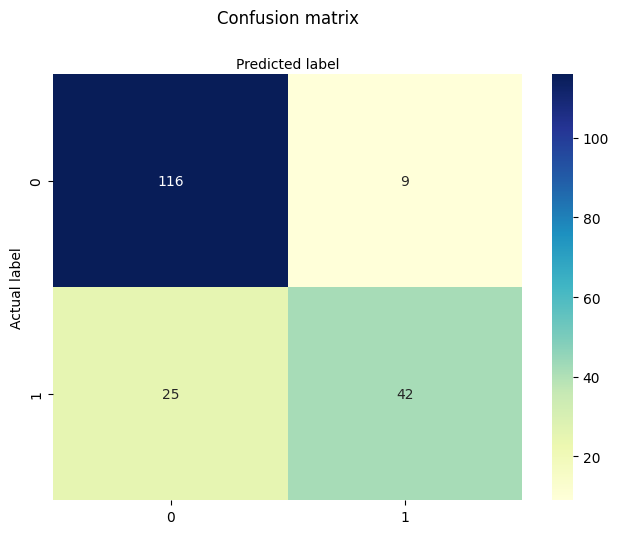

In [87]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

confusion matrix evaluation metrics

In [88]:
from sklearn.metrics import classification_report

In [89]:
target_names = ['without diabetes','with diabetes']

In [90]:
print(classification_report(y_test,y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



ROC Curve

> This stands for Receiving Operating Characteristics

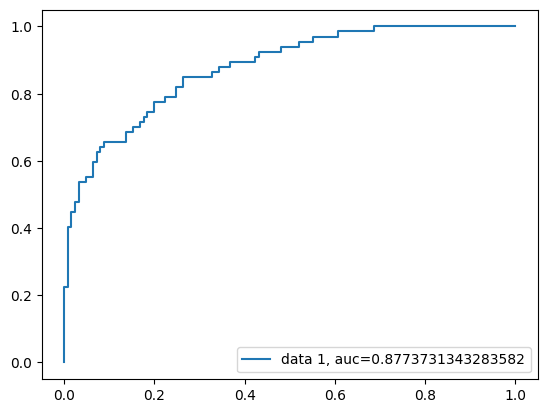

In [91]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()